# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,174,93,48,84,150,63,11,156,44,20,165,171,354,188,73,8,15,185,195
1,771,97,48,105,212,64,11,201,33,23,155,212,602,162,64,2,7,193,202
2,468,105,51,108,201,62,11,220,30,25,163,232,711,202,72,12,16,189,200
3,206,92,46,79,176,64,8,162,41,20,149,183,396,178,67,2,10,191,198
4,272,91,43,88,157,61,9,149,45,19,157,165,326,140,64,1,26,197,207
5,657,89,45,85,149,59,11,158,43,20,158,177,362,173,75,12,16,183,193
6,430,104,53,108,206,61,11,217,31,24,168,226,694,209,67,0,9,188,201
7,261,91,39,88,189,63,9,175,38,21,132,197,457,156,69,0,23,191,198
8,353,81,47,69,146,64,6,151,44,19,147,171,340,195,75,5,0,183,188
9,194,92,37,86,167,60,7,158,42,20,131,181,373,144,68,9,21,190,196


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.848816,93.511840,44.730419,82.020036,169.029144,61.876138,8.559199,168.369763,40.981785,20.535519,147.619308,188.559199,437.136612,174.530055,72.366120,6.202186,12.663024,189.041894,195.779599
std,241.050705,8.134272,6.025206,15.735773,33.263094,8.400945,4.877201,32.621864,7.673280,2.543260,14.173549,31.166416,173.107108,32.135172,7.587616,4.751211,9.046984,6.006389,7.316656
min,0.000000,73.000000,33.000000,40.000000,110.000000,47.000000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,113.000000,59.000000,0.000000,0.000000,176.000000,182.000000
25%,216.000000,87.000000,40.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,137.000000,168.000000,317.000000,150.000000,67.000000,2.000000,5.000000,185.000000,191.000000
50%,419.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,626.000000,99.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,197.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,182.000000,320.000000,1018.000000,261.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

##### 2.0.1. Remove unnecessary feature
The first feature is simply the number of object in set, of course we don't need this in our classificator.

In [6]:
X_train = X_train[:, 1:]
X_test = X_test[:, 1:]

##### 2.0.2. Remove strongly correlated features
Because we want to use logistic regression (which based on linear regression, we remember about some problems that gives us the correlated features - can cause overfitting and instability). So, let's check the correlation of features.

Text(0.5, 1.0, 'Correlation')

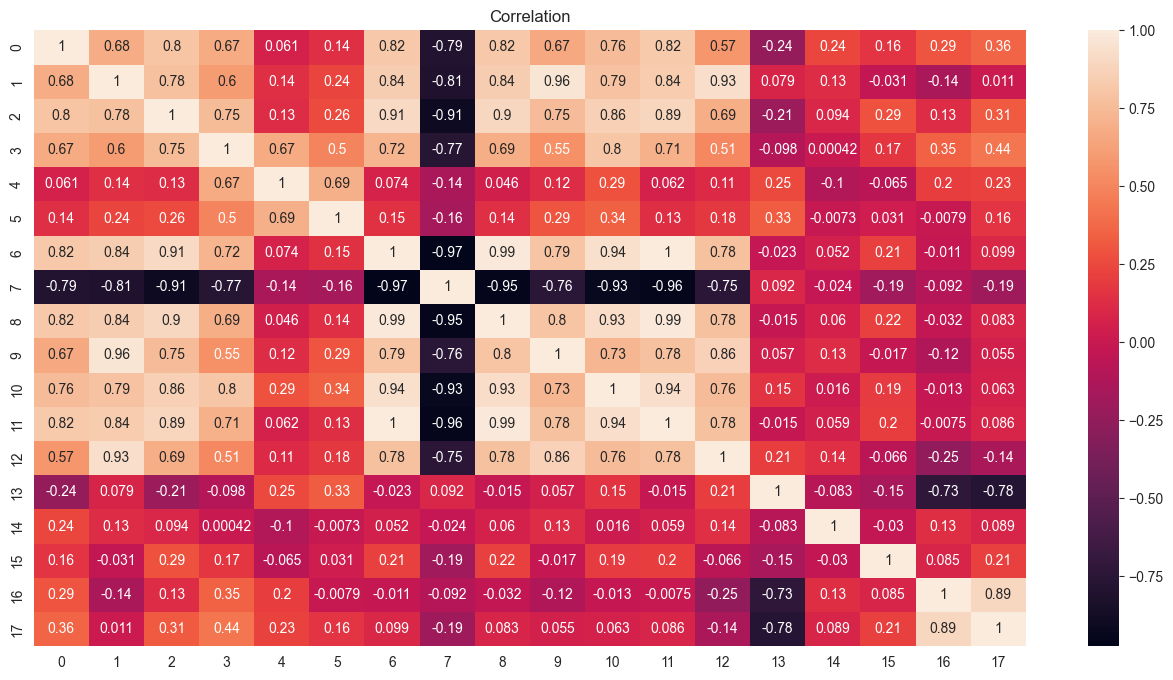

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

Let's choose the most correlated features and drop them from our dataset.

In [8]:
threshold = 0.92

corr_matrix = pd.DataFrame(X_train).corr().abs()
upper_tr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
dropped = [column for column in upper_tr.columns if any(upper_tr[column] > threshold)]

X_train = pd.DataFrame(X_train).drop(dropped, axis=1, inplace=False)
X_test = pd.DataFrame(X_test).drop(dropped, axis=1, inplace=False)

Text(0.5, 1.0, 'Correlation')

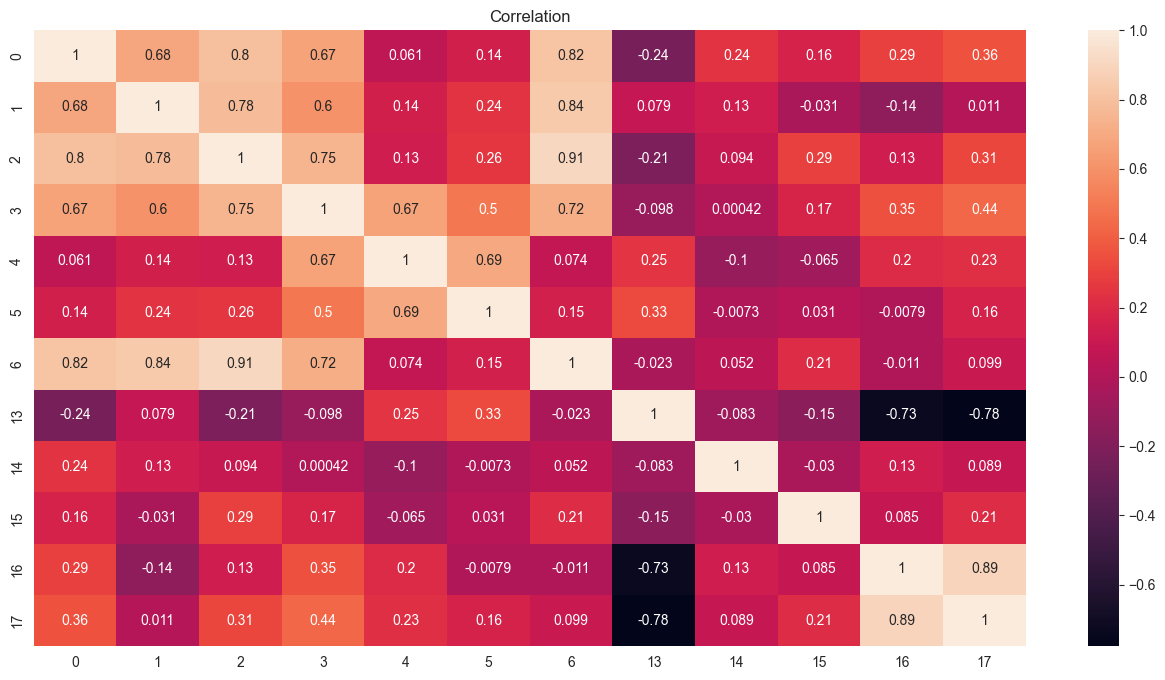

In [9]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(pd.DataFrame(X_train).corr(), annot=True)
heatmap.set_title("Correlation")

##### 2.0.3. Removing outliers
Below we will use logistic regression with MSE, so MSE is quite sensitive about outliers. To get better classifier we need to drop outliers.

In [10]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [11]:
# create mask
mask = yhat != -1

In [12]:
# remove all rows that are outliers
X_train, y_train = X_train.to_numpy()[mask, :], y_train[mask]

In [13]:
(X_train.shape, y_train.shape)

((537, 12), (537,))

##### 2.0.4. Normalization
Because we will be using logistic regression classificator, we need to normalize our dataset (in order to avoid gradient explosion).

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,5.370000e+02,537.000000,5.370000e+02,5.370000e+02
mean,-7.575153e-16,-3.638720e-16,3.804116e-16,2.315549e-16,2.183232e-16,-2.778659e-16,2.282470e-16,8.584071e-16,-5.127287e-17,0.000000,1.349634e-15,9.874162e-16
std,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932e+00,1.000932,1.000932e+00,1.000932e+00
min,-2.544560e+00,-1.946207e+00,-2.664996e+00,-1.875484e+00,-2.616746e+00,-2.783875e+00,-1.758000e+00,-2.067122e+00,-1.305720e+00,-1.395952,-2.188211e+00,-1.919304e+00
25%,-7.991220e-01,-7.711681e-01,-7.526942e-01,-8.261804e-01,-7.729033e-01,-5.139981e-01,-6.835686e-01,-7.761851e-01,-8.857310e-01,-0.844269,-6.904595e-01,-6.796948e-01
50%,-1.757511e-01,-9.971731e-02,-1.790038e-01,-1.047839e-01,-3.536608e-02,-6.002280e-02,-3.359584e-01,-1.307164e-01,-4.575299e-02,-0.182250,-2.479208e-02,1.467115e-01
75%,6.969681e-01,7.395961e-01,1.032120e+00,8.461479e-01,7.021712e-01,8.479278e-01,9.280785e-01,5.147522e-01,5.842305e-01,0.700442,6.408754e-01,6.976490e-01
max,2.941103e+00,2.250360e+00,1.924528e+00,2.190569e+00,2.546014e+00,7.657557e+00,2.950538e+00,2.935260e+00,3.314159e+00,3.127845,2.471461e+00,2.074993e+00


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'class_weight' : ['balanced', None],
    'penalty' : ['l1', 'l2', None, 'elasticnet'],
    'C' : [0.5, 1.0, 1.5]
}
grid_cv = GridSearchCV(logreg, param_grid=param_grid, scoring=['accuracy', 'f1_weighted'], cv=5, refit=False)
grid_cv.fit(X_train, y_train)

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_rati

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             param_grid={'C': [0.5, 1.0, 1.5],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', None, 'elasticnet']},
             refit=False, scoring=['accuracy', 'f1_weighted'])

In [67]:
for i in range(len(grid_cv.cv_results_['params'])):
    print(f"f1_weighted: {grid_cv.cv_results_['mean_test_f1_weighted'][i]}",
          f"accuracy: {grid_cv.cv_results_['mean_test_accuracy'][i]}",
          f"\nparams: {grid_cv.cv_results_['params'][i]}")

f1_weighted: 0.7320492614824197 accuracy: 0.742159916926272 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l1'}
f1_weighted: 0.7295482618663625 accuracy: 0.7384389061959155 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2'}
f1_weighted: 0.7486187696648432 accuracy: 0.7532537210107304 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': None}
f1_weighted: nan accuracy: nan 
params: {'C': 0.5, 'class_weight': 'balanced', 'penalty': 'elasticnet'}
f1_weighted: 0.7336091221988431 accuracy: 0.7421945309795777 
params: {'C': 0.5, 'class_weight': None, 'penalty': 'l1'}
f1_weighted: 0.7178115562106805 accuracy: 0.7273104880581516 
params: {'C': 0.5, 'class_weight': None, 'penalty': 'l2'}
f1_weighted: 0.7491826162792228 accuracy: 0.7532537210107304 
params: {'C': 0.5, 'class_weight': None, 'penalty': None}
f1_weighted: nan accuracy: nan 
params: {'C': 0.5, 'class_weight': None, 'penalty': 'elasticnet'}
f1_weighted: 0.72911586747787 accuracy: 0.7384215991692626 
p

In [68]:
best_params_lr = {'C': 1.5, 'class_weight': None, 'penalty': 'l2'}
logreg.set_params(**best_params_lr)

LogisticRegression(C=1.5, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [69]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict_proba(X_test)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

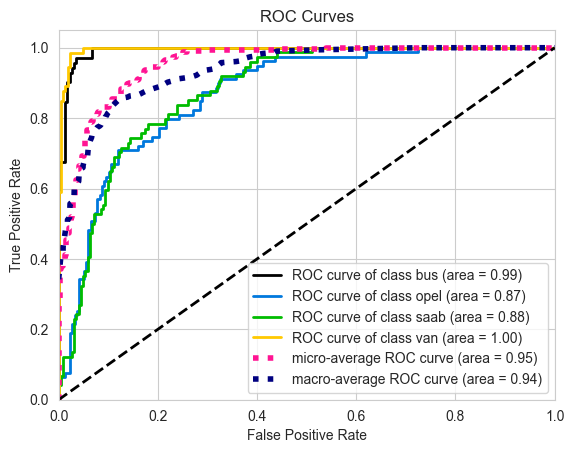

In [70]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_pred)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [ ]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE